In [14]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm, metrics
import math
from keras import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [2]:
data = pd.read_csv('./Real estate.csv', index_col=False)

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
L = len(data)
print(L)

414


In [7]:
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [8]:
Y = data[['Y house price of unit area']]
Y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [9]:
def normalize_x(X1, X2, X3, X4, X5):
    Z = []
    x1min, x2min, x3min, x4min, x5min = np.amin(X1), np.amin(X2), np.amin(X3), np.amin(X4), np.amin(X5)
    x1max, x2max, x3max, x4max, x5max = np.amax(X1), np.amax(X2), np.amax(X3), np.amax(X4), np.amax(X5)
    d1, d2, d3, d4, d5 = x1max-x1min, x2max-x2min, x3max-x3min, x4max-x4min, x5max-x5min
    for i in range(L):
        q1 = (X1[i] - x1min)/d1
        q2 = (X2[i] - x2min)/d2
        q3 = (X3[i] - x3min)/d3
        q4 = (X4[i] - x4min)/d4
        q5 = (X5[i] - x5min)/d5
        Z.append([q1,q2,q3,q4,q5])
    return Z

In [10]:
Xn = normalize_x(X[['X2 house age'][0]], X[['X3 distance to the nearest MRT station'][0]], X[['X4 number of convenience stores'][0]], X[['X5 latitude'][0]], X[['X6 longitude'][0]])
print(Xn[0:5])

[[0.7305936073059361, 0.00951267162646579, 1.0, 0.616941347552139, 0.7193228380417941], [0.4452054794520548, 0.043809390872388755, 0.9, 0.5849491032477333, 0.7114513694199472], [0.3036529680365297, 0.0833150513098478, 0.5, 0.671231216674745, 0.7588958378261307], [0.3036529680365297, 0.0833150513098478, 0.5, 0.671231216674745, 0.7588958378261307], [0.11415525114155252, 0.05679908927803007, 0.5, 0.573194377120705, 0.7431529005822837]]


In [11]:
def normalize_y(Y):
    Z = []
    ymin = np.amin(Y)
    ymax = np.amax(Y)
    d = ymax - ymin
    for i in range(len(Y)):
        Z.append((Y[i] - ymin)/d)
    return Z

In [12]:
Yn = normalize_y(Y[['Y house price of unit area'][0]])
print(Yn[0:5])

[0.27570518653321197, 0.3148316651501365, 0.3612374886260236, 0.42948134667879884, 0.3230209281164695]


In [15]:
X_train, X_test, Y_train, Y_test =  train_test_split(Xn, Yn, test_size=0.05, shuffle=True)

In [16]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
Ymax = np.amax(Y[['Y house price of unit area'][0]]) 
Ymin = np.amin(Y[['Y house price of unit area'][0]])
D = Ymax - Ymin

In [18]:
def rev_normalize(pr):
    Z = []
    for i in range(len(pr)):
        Z.append((pr[i]*D)+Ymin)
    Z = np.asarray(Z)
    return Z

In [25]:
import sklearn.metrics as metrics

p = xgbr.predict(X_test)
P = rev_normalize(p)

yt = rev_normalize(Y_test)

# Accuracy evaluation
A = sklearn.metrics.mean_absolute_error(Y_test, p)           # Best possibe result would be 0.0
print("Accuracy is:", A)

np.set_printoptions(suppress=True)

# Printing results
print("Predictions:")
print(P)
print("Expected values:")
print(yt)

Accuracy is: 0.042450910334453265
Predictions:
[43.90104793 21.80841416 43.99984333 23.48544679 58.08342529 53.21352663
 45.21486563 47.60819112 37.13378888 53.10256031 41.74185548 50.86765988
 42.99994766 34.83212688 46.34138672 27.60840255 55.9115608  22.58761688
 18.21279572 49.51133565 13.66478334]
Expected values:
[51.7 23.5 45.7 28.8 58.  51.8 37.9 51.  37.  44.5 43.2 44.9 53.  35.6
 78.3 29.3 55.5 23.8 12.2 48.6 13.8]


<Figure size 2160x1440 with 0 Axes>

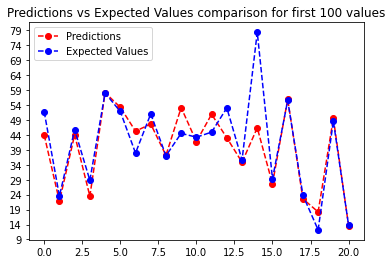

<Figure size 2160x1440 with 0 Axes>

In [24]:
L_t = range(len(yt))
ylabels = []
for i in range(math.floor(np.amin(yt)-3),math.ceil(np.amax(yt)+3),5):
    ylabels.append(i)
plt.yticks(ylabels,ylabels)
plt.plot(L_t, P, 'r', linestyle='--', marker='o', label="Predictions")
plt.plot(L_t, yt, 'b', linestyle='--', marker='o', label="Expected Values")
plt.title('Predictions vs Expected Values comparison for first 100 values')
plt.legend(loc='best')
plt.figure(figsize=(30,20))